## algoritmo de aprendizaje no supervisado 
## hierarchical clustering

## estudiante: carlos andres gomez moreno

In [113]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

In [114]:
# librerías de para implementar modelo HC
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [115]:
# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

In [116]:
#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [117]:
# Cargar el conjunto de datos en la variable data
data = pd.read_csv('Mall_Customers.csv')

In [118]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [119]:
data.shape

(200, 5)

In [120]:
display (data.describe())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [121]:
data = data.set_index('CustomerID')

dic = {'Male': 1, 'Female': 0}
#Reemplazar datos Texto por Numéricos
data['Gender'] = data['Gender'].replace(dic).astype(int)

display (data.head())
display (data.tail())

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74
199,1,32,137,18
200,1,30,137,83


In [122]:
# verificar si tenemos valores nulos
data.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

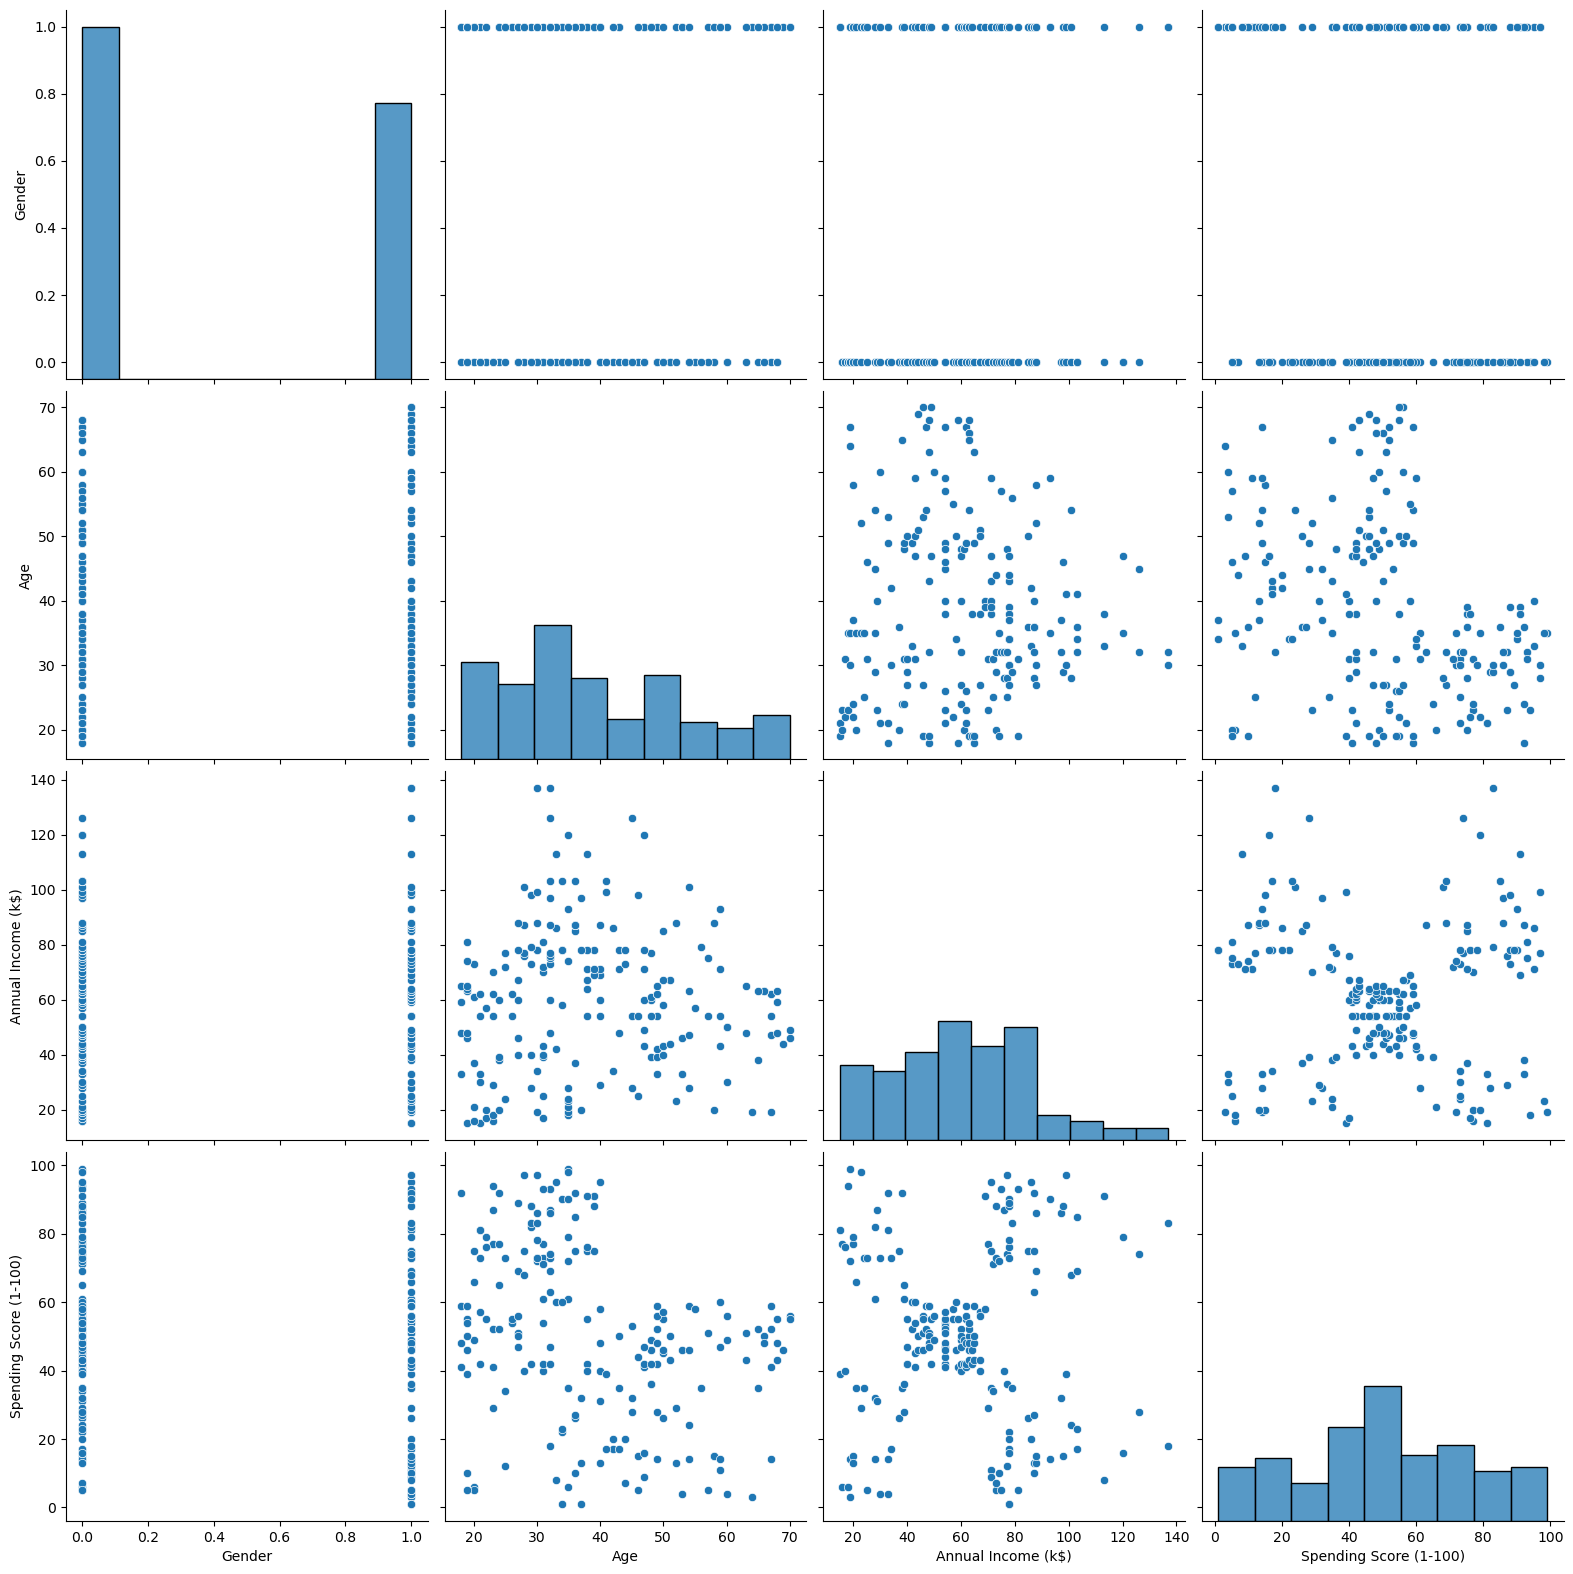

In [123]:
##3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
sns.pairplot(data.dropna(),size=4,kind='scatter')

In [124]:
corr_matrix = data.corr()
corr_matrix

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


<Axes: >

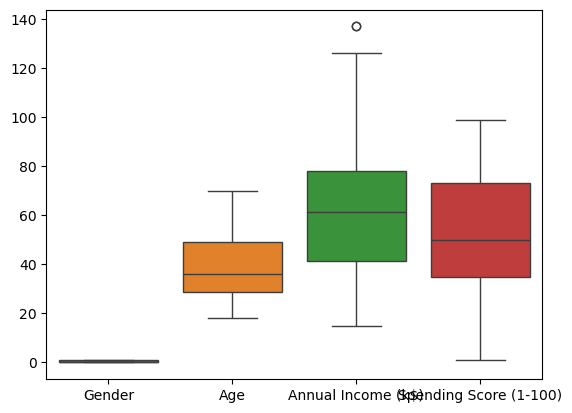

In [125]:
sns.boxplot(data=data)

In [126]:
## 4. Entrenar el modelo configurando los diferentes hiperparámetros.
## estandarizar los datos antes de aplicar el algoritmo
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


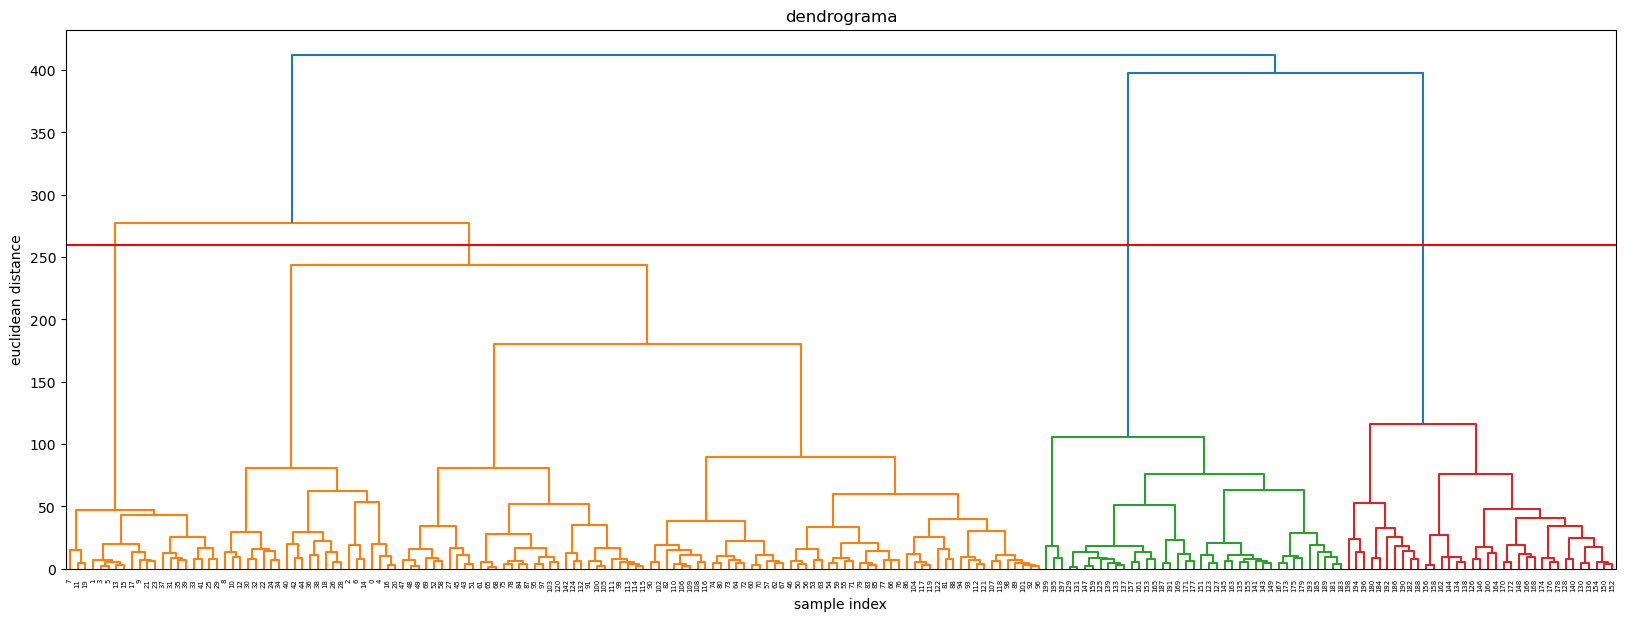

In [127]:
ward_clustering = linkage(X, method= "ward", metric="euclidean")
plt.figure(figsize=(20,7))
dendrogram(ward_clustering)
plt.axhline(y = 260, color = 'r', linestyle = '-')
plt.title('dendrograma')
plt.xlabel('sample index')
plt. ylabel('euclidean distance')
plt.show()

In [141]:
hier_clustering = AgglomerativeClustering(n_clusters=4)
labels_hier = hier_clustering.fit_predict(x)
labels_hier

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 0, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int64)

In [142]:
labels = labels_hier
colores=['red','green','cyan','black','Orange','Gray', 'White']
asignar=[]
for row in labels: asignar.append(colores[row])

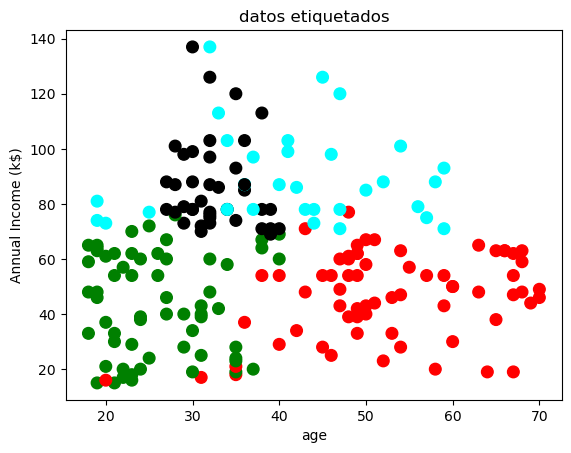

In [143]:
f1 = X['Age'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c= asignar, s=70)
plt.title('datos etiquetados')
plt.xlabel('age')
plt.ylabel('Annual Income (k$)')
plt.show()

In [144]:
#calcular medidas de calidad para clustering jerarquico
print("\nMedidas de calidad para clustering jerarquico")
print("puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("indice de calinski-harabasz:",metrics.calinski_harabasz_score(X, labels_hier))
print("davies-bouldin index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para clustering jerarquico
puntaje de silueta: 0.36800133109767097
indice de calinski-harabasz: 114.80927394773552
davies-bouldin index: 1.1233101690289637


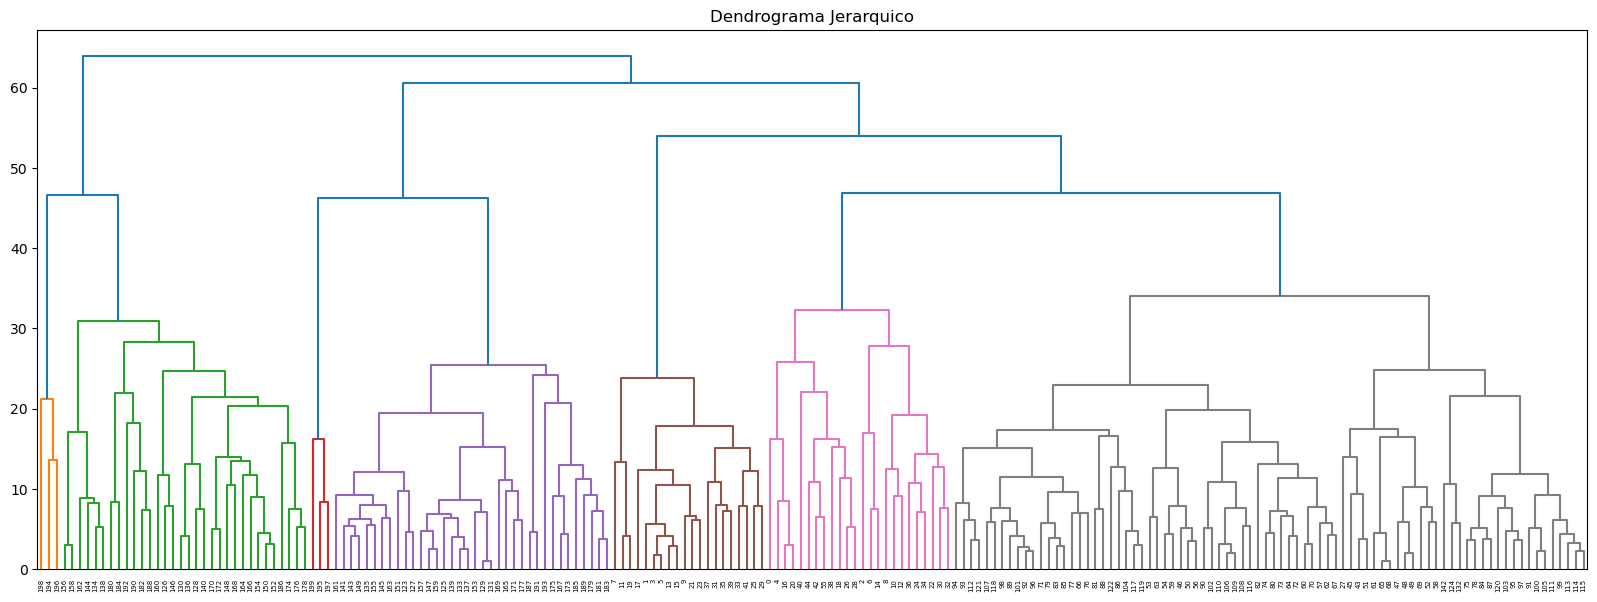

In [147]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

linked = linkage(X, 'average')

plt.figure(figsize=(20, 7))
dendrogram(linked)
plt.title('Dendrograma Jerarquico')
plt.show()

In [148]:
#calcular medidas de calidad para clustering jerarquico
print("\nMedidas de calidad para clustering jerarquico")
print("puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("indice de calinski-harabasz:",metrics.calinski_harabasz_score(X, labels_hier))
print("davies-bouldin index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para clustering jerarquico
puntaje de silueta: 0.36800133109767097
indice de calinski-harabasz: 114.80927394773552
davies-bouldin index: 1.1233101690289637


## resultados

In [ ]:

##El dendrograma nos representa la disposición de los cluster que se agrupan por jerarquias. Observando el dendrograma, y luego de unas pruebas con las métricas, observamos que un número adecuado de clusters es 7 (igual que en k-means)

#Coeficiente de Silhoutte: La puntuación de Silhoutte de 0.36 indica que los clusters estan moderadamente bien separados.

#Índice Calinski: Puntuación de 114 indica clusters relativamente bien definidos aunque pierde puntaje respecto a k-means.

#Índice Davies Bouldin: Puntuación de 1.23 que indica que puede existir un solapamiento en los clusters.
